### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

In [4]:
a = '/gpfs/home/avd22gnu/scratch/ModelRuns/ORCA025/TOM12_PT_HB08'

b = '/gpfs/home/avd22gnu/scratch/ModelRuns/ORCA025/TOM12_PT_HB14'

c = '/gpfs/home/avd22gnu/scratch/ModelRuns/ORCA025/TOM12_PT_HB15'



In [5]:
# maskno = w['STChl'][20,:,:].values
# print(np.nanmax(maskno))
# print(np.nanmin(maskno))

# w

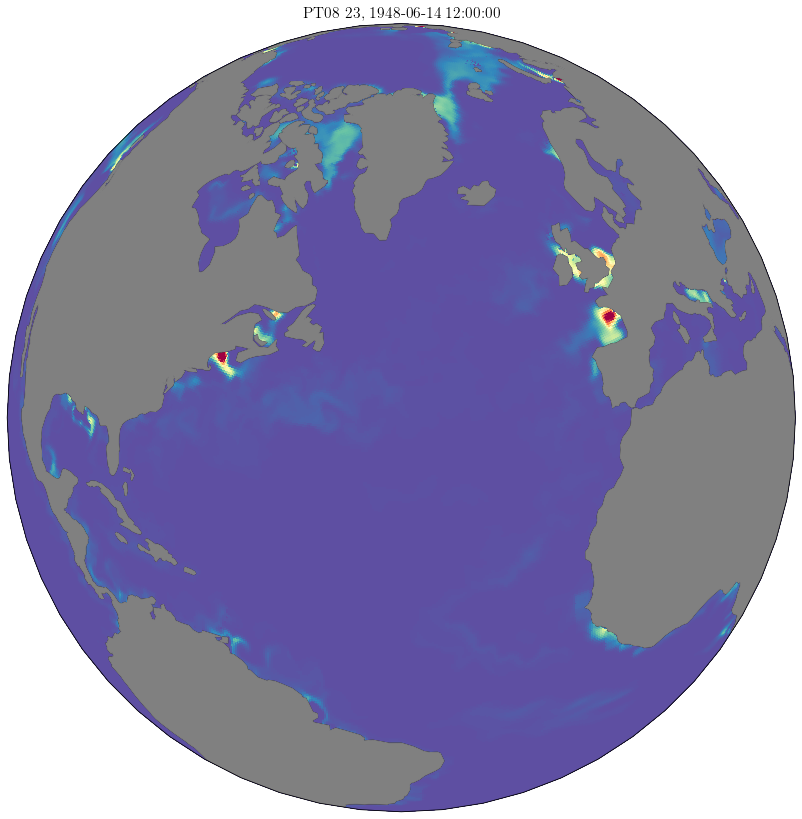

In [24]:
nos = ['08']#,'14','15']


for no in nos:

    w = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/PT_025_regridded/PT_HB{no}_ORCA025_7d_19480101_19481231_diad_T_rg.nc')


    for tn in range(23,24):
    
        # 35785831
        fact = 1
        tfig = plt.figure(figsize=[14.5*fact, 14.5*fact])
        ax = plt.axes(projection=ccrs.NearsidePerspective(-40, 40, 15785831))

        tma = 4e-5

        cmap = 'Spectral_r'

        nav_lon = w['lon'].values
        nav_lat = w['lat'].values
        maskno = w['STChl'][tn,:,:].values
        tti = w.time_counter[tn].values
        mesh = ax.pcolormesh(nav_lon, nav_lat, maskno, transform=ccrs.PlateCarree(), cmap=cmap, zorder =0, alpha = 1,\
                            vmin = 0, vmax = tma)

        ax.coastlines(zorder = 1 )
        #lons, lats extent
        #ax.set_extent([ -82, 30, 30, 90,], crs=ccrs.Orthographic())

        ax.add_feature(cp.feature.LAND, color='grey', alpha = 1, zorder = 1)
        ax.set_title(f'PT{no} {tn}, {tti}')
        #plt.savefig(f'./plt/PT{no}-{tn}.jpg')



1948-3-29


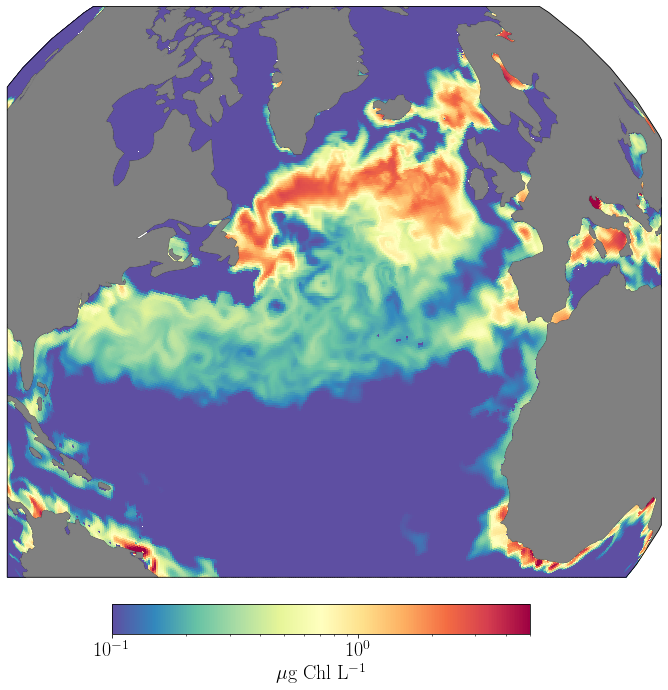

In [55]:
import matplotlib as mp
def mkplt(no, tn, tmi = 1e-1, tma = 5):
    w = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/PT_025_regridded/PT_HB{no}_ORCA025_7d_19480101_19481231_diad_T_rg.nc')



    fact = 1
    fig = plt.figure(figsize=[14.5*fact, 10.5*fact])
    ax = plt.axes(projection=ccrs.NearsidePerspective(-40, 40, 15785831))

    tma = tma

    cmap = 'Spectral_r'
    #cmap = cm.speed
    
    nav_lon = w['lon'].values
    nav_lat = w['lat'].values
    maskno = w['STChl'][tn,:,:].values * 1e6
    tti = w.time_counter[tn].values
    tti = tti.item()
    year = tti.year
    month = tti.month
    day = tti.day
    print(f'{year}-{month}-{day}')
    
    
    mesh = ax.pcolormesh(nav_lon, nav_lat, maskno, transform=ccrs.PlateCarree(), cmap=cmap, zorder =0, alpha = 1,\
                        vmin = tmi, vmax = tma, norm=mp.colors.LogNorm())

    ax.coastlines(zorder = 1 )
    #lons, lats extent
    ax.set_extent([ -82, 10, 10, 80,], crs=ccrs.PlateCarree())

    ax.add_feature(cp.feature.LAND, color='grey', alpha = 1, zorder = 1)
    #ax.set_title(f'PT{no} {tn}, {tti}')
    # Define the colorbar axis with the desired size (0.8 in horizontal, 0.1 in vertical)
    cax = fig.add_axes([0.3, 0.05, 0.4, 0.04])  # [left, bottom, width, height]
    cax.tick_params(labelsize=20)
    # Add a colorbar to the figure using the defined colorbar axis
    cbar = fig.colorbar(mesh, cax=cax, orientation='horizontal')
    cbar.set_label('$\mu$g Chl L$^{-1}$', fontsize = 20)
    
    # cbar = plt.colorbar(mesh, ax=ax, label='Log-scaled Values')
    # cbar.ax.set_yscale('log')
    #plt.set_yscale('log')
    #plt.savefig(f'./plt/ni/nice_PT{no}-{year}-{month}-{day}.jpg')

for i in range(12,13):#40):
    mkplt('08', i)
# mkplt('08', 17)
# mkplt('14', 24)
# mkplt('15', 23)

In [8]:
tti = tti.item()

year = tti.year
month = tti.month
day = tti.day
print(f'{year}-{month}-{day}')

1948-6-21


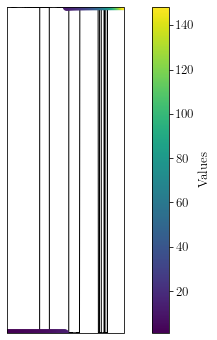

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.ticker import LogLocator, NullFormatter

# Create figure and axis using cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set global extent (or any desired range)
ax.set_global()

# Add coastlines for reference
ax.coastlines()

# Generate some example data (latitudes, longitudes, and values)
lons = np.linspace(-180, 180, 100)
lats = np.linspace(-90, 90, 100)
values = np.exp(np.linspace(0, 5, 100))  # Example values that grow exponentially

# Plot using scatter
sc = ax.scatter(lons, lats, c=values, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(sc, ax=ax, label='Values')

# Set y-axis to log scale
ax.set_yscale('log')

# Customize the y-axis ticks (optional)
ax.yaxis.set_major_locator(LogLocator(base=10.0))
ax.yaxis.set_minor_formatter(NullFormatter())

plt.show()